In [51]:
# ex1 a)

from HW2_util import TwoLayerLinearClassificationNN as TwoLayerNN

training_data_x_ex1a = [[1,0],
                        [-1,0],
                        [0,1],
                        [0,-1]]
training_data_y_ex1a = [1,1,2,2]

ex1a_model = TwoLayerNN(training_data_x_ex1a, training_data_y_ex1a)

# have to run multiple times
ex1a_model.find_good_parameters(5000, num_of_good_models=4)
# ex1a_model.plot_loss_accuracy(num_epoch=5000, learning_rate=0.05)


344 trainings, model accuracy is 1.0
('0.weight', Parameter containing:
tensor([[ 0.0028, -1.2003],
        [-0.0942, -0.5903]], requires_grad=True))
('0.bias', Parameter containing:
tensor([-0.0013,  0.5869], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-0.6277,  0.2736],
        [ 0.9089, -0.5926]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.5468, 0.5486], requires_grad=True))
The loss is 0.09791567921638489

345 trainings, model accuracy is 1.0
('0.weight', Parameter containing:
tensor([[-0.0026, -1.2019],
        [-0.0932, -0.5895]], requires_grad=True))
('0.bias', Parameter containing:
tensor([-0.0051,  0.5911], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-0.6294,  0.2761],
        [ 0.9098, -0.5945]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.5458, 0.5499], requires_grad=True))
The loss is 0.0975758507847786

346 trainings, model accuracy is 1.0
('0.weight', Parameter containing:
tensor([[-0.0026

In [7]:
# import pandas as pd
# import numpy as np
# # ex1 b)
# 
# df = pd.read_csv('./data/data_HW2_ex1.csv')
# X = np.column_stack((df['x1'].values, df['x2'].values))
# y = df['class'].values
# 
# ex1b_model = TwoLayerNN(X, y)
# # ex1b_model.train_model_and_print(500)
# # print(ex1b_model.measure_accuracy_in_training_data())
# ex1b_model.find_good_parameters(500, num_of_good_models=4)


339 trainings, model accuracy is 0.905
('0.weight', Parameter containing:
tensor([[-0.0434,  0.7717],
        [ 0.1653, -0.4419]], requires_grad=True))
('0.bias', Parameter containing:
tensor([-0.1512,  0.2146], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-0.3553, -0.2813],
        [ 0.7624,  0.3256]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.6327, 0.2790], requires_grad=True))
The loss is 0.17311884462833405

340 trainings, model accuracy is 0.905
('0.weight', Parameter containing:
tensor([[-0.0435,  0.7733],
        [ 0.1645, -0.4456]], requires_grad=True))
('0.bias', Parameter containing:
tensor([-0.1514,  0.2132], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-0.3576, -0.2828],
        [ 0.7630,  0.3279]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.6336, 0.2780], requires_grad=True))
The loss is 0.17244598269462585

341 trainings, model accuracy is 0.91
('0.weight', Parameter containing:
tensor([[-

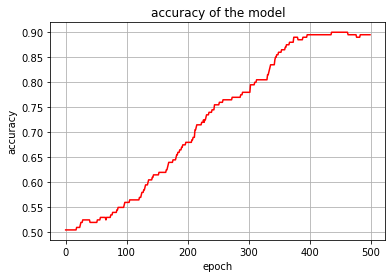

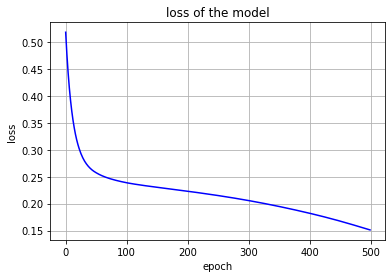

In [65]:
import pandas as pd
import numpy as np
from HW2_util import TwoLayerLinearClassificationNN as TwoLayerNN

df = pd.read_csv('./data/data_HW2_ex1.csv')
X = np.column_stack((df['x1'].values, df['x2'].values))
y = df['class'].values

ex1b_model = TwoLayerNN(X, y)
ex1b_model.plot_loss_accuracy(num_epoch=500, learning_rate=0.03)